In [7]:
import ROOT
from ROOT import TF1, TCanvas, TPad
from ROOT.TMath import Cos

First, we will define the functions that relate $x$ and $Q^2$ using the electron method for constant $y$, $E'$, and $\theta'$.

In [8]:
def func_y(xx, par):
    x = xx[0]
    y = par[0]
    
    Ee = par[1]
    Ep = par[2]
    s = 4 * Ee * Ep
    
    return s * y * x

def func_E_prime(xx, par):
    x = xx[0]
    E_prime = par[0]
    
    Ee = par[1]
    Ep = par[2]
    
    res = (2 * Ee * (Ee - E_prime) * x) / ((Ee/Ep) - x)
    if res > 4 * Ee * Ep * x:
        return 4 * Ee * Ep * x
    
    return res

def func_theta_prime(xx, par):
    x = xx[0]
    theta_prime = par[0] * 3.1415926535 / 180
    
    Ee = par[1]
    Ep = par[2]
    s = 4 * Ee * Ep
    
    exp_num = Ep * x * (1 - Cos(theta_prime))
    exp_den = Ee * (1 + Cos(theta_prime))
    
    return s * x / (1 + exp_num / exp_den)

Next, we create a function that will create electron method plots given an energy frame as inputs.

In [9]:
def generic_electron_method(Ee, Ep):
    funcs = []
    
    const_y = TF1('x vs. Q^2 for constant y', func_y, 1e-5, 1, 3)
    const_y.SetParameter(1, Ee)
    const_y.SetParameter(2, Ep)
    const_y.SetLineColor(3)
    const_y.SetLineStyle(9)
    const_y.SetNpx(10000)
    ys = [1, 0.1, 0.01]
    
    const_E_prime = TF1('x vs. Q^2 for constant E prime', func_E_prime, 1e-5, 1, 3)
    const_E_prime.SetParameter(1, Ee)
    const_E_prime.SetParameter(2, Ep)
    const_E_prime.SetLineColor(2)
    const_E_prime.SetNpx(10000)
    E_primes = [2, 4, 6, 8, 10, 12, 20, 40, 100]
    
    const_theta_prime = TF1('x vs. Q^2 for constant theta prime', func_theta_prime, 1e-5, 1, 3)
    const_theta_prime.SetParameter(1, Ee)
    const_theta_prime.SetParameter(2, Ep)
    const_theta_prime.SetFillStyle(1001)
    const_theta_prime.SetNpx(10000)
    theta_primes = [4, 33, 147, 176]
    theta_prime_colors = [38, 41, 30, 40]
    
    for i in range(len(theta_primes)):
        const_theta_prime.SetParameter(0, theta_primes[i])
        const_theta_prime.SetLineColor(theta_prime_colors[i])
        const_theta_prime.SetFillColor(theta_prime_colors[i])
        
        funcs.append(const_theta_prime.Clone('theta=' + str(theta_primes[i])))
    
    for i in range(len(E_primes)):
        const_E_prime.SetParameter(0, E_primes[i])
        funcs.append(const_E_prime.Clone('E=' + str(E_primes[i])))
    
    for i in range(len(ys)):
        const_y.SetParameter(0, ys[i])
        funcs.append(const_y.Clone('y=' + str(ys[i])))
    
    return funcs

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c10x100


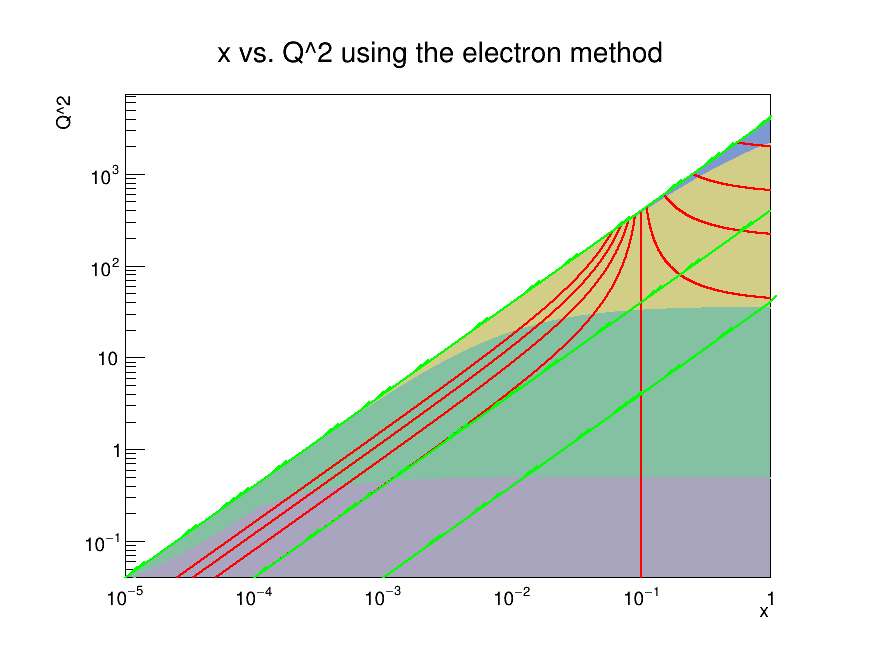

In [10]:
c1 = TCanvas('c10x100', 'Canvas containing x vs. Q^2', 10, 10, 900, 700)
    
pad1 = TPad('pad10x100', 'The pad with the x vs. Q^2 functions', 0.05, 0.05, 0.95, 0.95)
pad1.Draw()
pad1.cd()
pad1.SetLogx()
pad1.SetLogy()

funcs10x100 = generic_electron_method(10, 100)
for i in range(len(funcs10x100)):
    graphtype = '' if i == 0 else 'SAME'
    funcs10x100[i].SetTitle('x vs. Q^2 using the electron method; x; Q^2')
    funcs10x100[i].Draw(graphtype)
    
c1.Update()
c1.Draw()